# Effect of observational systematics on the photo-z
The purpose of this notebook is to get familiar with GCR catalogues as well as the rail package. 

Aims:
- Load a catalogue of DC2 objects with reasonable cuts
- Access their observed photometry bands and true redshifts
- Load rail packages (especially the evaluation package)
- Compute the photometric redshifts for the objects
- Compare with the true redshifts

Further aims:
- Explore the effect of systematics - where can the different observational effects be accessed?
- Repeat the analysis for the same set of objects but now with some observational effects turned on/off

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#dependences for GCR catalogue:
import GCRCatalogs
# Load the object catalog
#catalog = GCRCatalogs.load_catalog('dc2_object_run2.2i_dr3')
catalog = GCRCatalogs.load_catalog('dc2_object_run2.2i_dr6_with_addons')

In [3]:
from astropy.io import fits

In [22]:
sorted(GCRCatalogs.get_available_catalogs(False))

['base5000_v1.1.1',
 'base5000_v1.1.1_9431_9812',
 'base5000_v1.1.1_9556',
 'base5000_v1.1.1_image',
 'base5000_v1.1.1_small',
 'base5000_v1.1.1_z_0_1',
 'base5000_v1.1.1_z_1_2',
 'baseDC2_snapshot_z0.15_v0.1',
 'baseDC2_snapshot_z0.15_v0.1_small',
 'baseDC2_snapshot_z1.01_v0.1',
 'baseDC2_v1.1_9431_9812',
 'baseDC2_v1.1_9556',
 'baseDC2_v1.1_image',
 'buzzard',
 'buzzard_high-res',
 'buzzard_high-res_v1.1',
 'buzzard_test',
 'buzzard_v2.0.0_3',
 'buzzard_v2.0.0_4',
 'buzzard_v2.0.0_test',
 'cosmoDC2',
 'cosmoDC2_v1.0',
 'cosmoDC2_v1.0_10194_10452',
 'cosmoDC2_v1.0_8786_9049',
 'cosmoDC2_v1.0_9050_9430',
 'cosmoDC2_v1.0_9431_9812',
 'cosmoDC2_v1.0_9556',
 'cosmoDC2_v1.0_9813_10193',
 'cosmoDC2_v1.0_image',
 'cosmoDC2_v1.0_image_addon_knots',
 'cosmoDC2_v1.0_small',
 'cosmoDC2_v1.1.4',
 'cosmoDC2_v1.1.4_image',
 'cosmoDC2_v1.1.4_image_addon_knots',
 'cosmoDC2_v1.1.4_image_combined_agn',
 'cosmoDC2_v1.1.4_image_with_photoz_calib',
 'cosmoDC2_v1.1.4_image_with_photozs_flexzboost_v1',
 'co

In [48]:
sorted(catalog.list_all_quantities())

['ID',
 'I_flag',
 'I_flag_g',
 'I_flag_i',
 'I_flag_r',
 'I_flag_u',
 'I_flag_y',
 'I_flag_z',
 'IxxPSF_pixel',
 'IxxPSF_pixel_g',
 'IxxPSF_pixel_i',
 'IxxPSF_pixel_r',
 'IxxPSF_pixel_u',
 'IxxPSF_pixel_y',
 'IxxPSF_pixel_z',
 'Ixx_pixel',
 'Ixx_pixel_g',
 'Ixx_pixel_i',
 'Ixx_pixel_r',
 'Ixx_pixel_u',
 'Ixx_pixel_y',
 'Ixx_pixel_z',
 'IxyPSF_pixel',
 'IxyPSF_pixel_g',
 'IxyPSF_pixel_i',
 'IxyPSF_pixel_r',
 'IxyPSF_pixel_u',
 'IxyPSF_pixel_y',
 'IxyPSF_pixel_z',
 'Ixy_pixel',
 'Ixy_pixel_g',
 'Ixy_pixel_i',
 'Ixy_pixel_r',
 'Ixy_pixel_u',
 'Ixy_pixel_y',
 'Ixy_pixel_z',
 'IyyPSF_pixel',
 'IyyPSF_pixel_g',
 'IyyPSF_pixel_i',
 'IyyPSF_pixel_r',
 'IyyPSF_pixel_u',
 'IyyPSF_pixel_y',
 'IyyPSF_pixel_z',
 'Iyy_pixel',
 'Iyy_pixel_g',
 'Iyy_pixel_i',
 'Iyy_pixel_r',
 'Iyy_pixel_u',
 'Iyy_pixel_y',
 'Iyy_pixel_z',
 'base_Blendedness_abs',
 'base_Blendedness_abs_child_instFlux',
 'base_Blendedness_abs_child_xx',
 'base_Blendedness_abs_child_xy',
 'base_Blendedness_abs_child_yy',
 'base_Blended

In [4]:
sorted(q for q in catalog.list_all_quantities() if q.startswith('photoz_'))

['photoz_mean',
 'photoz_median',
 'photoz_mode',
 'photoz_mode_ml',
 'photoz_mode_ml_red_chi2',
 'photoz_odds',
 'photoz_pdf']

In [40]:
sorted(q for q in catalog.list_all_quantities() if q.startswith('mag'))

['mag_g',
 'mag_g_cModel',
 'mag_g_noMW_truth',
 'mag_g_truth',
 'mag_i',
 'mag_i_cModel',
 'mag_i_noMW_truth',
 'mag_i_truth',
 'mag_r',
 'mag_r_cModel',
 'mag_r_noMW_truth',
 'mag_r_truth',
 'mag_u',
 'mag_u_cModel',
 'mag_u_noMW_truth',
 'mag_u_truth',
 'mag_y',
 'mag_y_cModel',
 'mag_y_noMW_truth',
 'mag_y_truth',
 'mag_z',
 'mag_z_cModel',
 'mag_z_noMW_truth',
 'mag_z_truth',
 'magerr_g',
 'magerr_g_cModel',
 'magerr_i',
 'magerr_i_cModel',
 'magerr_r',
 'magerr_r_cModel',
 'magerr_u',
 'magerr_u_cModel',
 'magerr_y',
 'magerr_y_cModel',
 'magerr_z',
 'magerr_z_cModel']

In [11]:
sorted(q for q in catalog.list_all_quantities() if q.startswith('flux'))

['flux_g_noMW_truth',
 'flux_g_truth',
 'flux_i_noMW_truth',
 'flux_i_truth',
 'flux_r_noMW_truth',
 'flux_r_truth',
 'flux_u_noMW_truth',
 'flux_u_truth',
 'flux_y_noMW_truth',
 'flux_y_truth',
 'flux_z_noMW_truth',
 'flux_z_truth']

In [6]:
print(len(catalog.available_tracts))
print(catalog.available_tracts[0], catalog.available_tracts[-1])

166
2723 5074


In [26]:
catalog.available_tracts

[2723,
 2724,
 2725,
 2726,
 2727,
 2728,
 2729,
 2730,
 2731,
 2732,
 2733,
 2734,
 2735,
 2896,
 2897,
 2898,
 2899,
 2900,
 2901,
 2902,
 2903,
 2904,
 2905,
 2906,
 2907,
 2908,
 3074,
 3075,
 3076,
 3077,
 3078,
 3079,
 3080,
 3081,
 3082,
 3083,
 3084,
 3085,
 3086,
 3256,
 3257,
 3258,
 3259,
 3260,
 3261,
 3262,
 3263,
 3264,
 3265,
 3266,
 3267,
 3268,
 3441,
 3442,
 3443,
 3444,
 3445,
 3446,
 3447,
 3448,
 3449,
 3450,
 3451,
 3452,
 3453,
 3454,
 3631,
 3632,
 3633,
 3634,
 3635,
 3636,
 3637,
 3638,
 3639,
 3640,
 3641,
 3642,
 3643,
 3825,
 3826,
 3827,
 3828,
 3829,
 3830,
 3831,
 3832,
 3833,
 3834,
 3835,
 3836,
 3837,
 4022,
 4023,
 4024,
 4025,
 4026,
 4027,
 4028,
 4029,
 4030,
 4031,
 4032,
 4033,
 4034,
 4035,
 4224,
 4225,
 4226,
 4227,
 4228,
 4229,
 4230,
 4231,
 4232,
 4233,
 4234,
 4235,
 4236,
 4429,
 4430,
 4431,
 4432,
 4433,
 4434,
 4435,
 4436,
 4437,
 4438,
 4439,
 4440,
 4441,
 4636,
 4637,
 4638,
 4639,
 4640,
 4641,
 4642,
 4643,
 4644,
 4645,
 4646,

In [7]:
#query
# Loop through alltracts using an iterator
ra_max_list=[]
ra_min_list=[]
dec_max_list=[]
dec_min_list=[]
tract_obj_num=[]
for d in catalog.get_quantities(['ra', 'dec', 'tract'],
                                #native_filters=['tract >= 2900', 'tract < 3000'],
                                return_iterator=True):
    #print(d['tract'][0])
    ra_max_list.append(d['ra'].max())
    ra_min_list.append(d['ra'].min())
    dec_max_list.append(d['dec'].max())
    dec_min_list.append(d['dec'].min())
    tract_obj_num.append(len(d['ra']))
#plt.xlabel('RA');
#plt.ylabel('Dec');
#plt.title('2900 <= Tract < 3000');

In [8]:
#len(ra_max_list)
#save these quantities
out=np.c_[np.array(catalog.available_tracts), np.array(tract_obj_num), np.array(ra_min_list), np.array(ra_max_list),
         np.array(dec_min_list), np.array(dec_max_list)]
print(out.shape)

fname='/global/cscratch1/sd/qhang/DESC_DC2_obs/tract_info.txt'
with open(fname,'w') as fout:
    fout.write('#tract, Nobj, ra_min, ra_max, dec_min, dec_max\n')
    np.savetxt(fout,out,fmt='% 18.8lf')


(166, 6)


In [9]:
! ls /global/cscratch1/sd/qhang/DESC_DC2_obs/tract_info.txt

/global/cscratch1/sd/qhang/DESC_DC2_obs/tract_info.txt


In [10]:
fname='/global/cscratch1/sd/qhang/DESC_DC2_obs/tract_info.txt'
fin=np.loadtxt(fname)
print(fin[:,0].max())

5074.0


In [4]:
#select data
from os.path import exists
from GCR import GCRQuery


def save_catalog_to_fits(fname, data_matrix):
    c=[]
    for ii, keys in enumerate(data_matrix.keys()):
        #print(keys)
        if keys=='tract':
            form='K'
        else:
            form='f8'
        col=fits.Column(name=keys, array=data_matrix[keys],format=form)
        c.append(col)
    t = fits.BinTableHDU.from_columns(c)
    t.writeto(fname)


basic_cuts = [
    GCRQuery('extendedness > 0'),     # Extended objects
    GCRQuery((np.isfinite, 'mag_i')), # Select objects that have i-band magnitudes
    GCRQuery('clean'), # The source has no flagged pixels (interpolated, saturated, edge, clipped...) 
                       # and was not skipped by the deblender
    GCRQuery('xy_flag == 0'),                                      # Flag for bad centroid measurement
    GCRQuery('ext_shapeHSM_HsmShapeRegauss_flag == 0'),            # Error code returned by shape measurement code
    GCRQuery((np.isfinite, 'ext_shapeHSM_HsmShapeRegauss_sigma')), # Shape measurement uncertainty should not be NaN
    
    #GCRQuery('snr_i_cModel > 10'),                              # SNR > 10
    GCRQuery('mag_i_cModel < 25.3'),                            # cModel imag brighter than 25.3
]

quantities=[
            'tract',
            'ra','dec','redshift_truth',
            'photoz_mode', 'photoz_mean', 'photoz_odds', #'photoz_pdf',
            'mag_u_cModel','mag_g_cModel','mag_r_cModel','mag_i_cModel','mag_z_cModel','mag_y_cModel',
            'magerr_u_cModel','magerr_g_cModel','magerr_r_cModel','magerr_i_cModel','magerr_z_cModel','magerr_y_cModel',
            'mag_u','mag_g','mag_r','mag_i','mag_z','mag_y',
            #'magerr_u','magerr_g','magerr_r','magerr_i','magerr_z','magerr_y',
            'mag_u_truth','mag_g_truth','mag_r_truth','mag_i_truth','mag_z_truth','mag_y_truth',
            'mag_u_noMW_truth'
            #'flux_u_truth','flux_g_truth','flux_r_truth','flux_i_truth','flux_z_truth','flux_y_truth'
            ]

#data_basic = catalog.get_quantities(quantities, 
                                    #filters=basic_cuts, 
                                    #native_filters=['tract == 4430'])

savedir='/global/cscratch1/sd/qhang/DESC_DC2_obs/'
tag='DC2_obj_with_pz'
for d in catalog.get_quantities(quantities,
                                filters=basic_cuts,
                                #native_filters=['tract >= 2900', 'tract < 2930'],
                                #native_filters=['tract >= 2734'],
                                return_iterator=True):
    #print(len(d['tract']))
    if len(d['tract'])>0:
        #keep track of the tract number:
        fname=savedir+tag+'-tract-%s.fits'%(d['tract'][0])
        #check if directory exists
        if(exists(fname)==False):
            save_catalog_to_fits(fname, d)
            print('saved tract %s'%d['tract'][0])
        else:
            print('file already exists.')

saved tract 2723


/global/common/software/lsst/common/miniconda/prod/envs/desc/lib/python3.8/site-packages/GCRCatalogs/dc2_dm_catalog.py:43: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux) + AB_mag_zp_wrt_nanoJansky


saved tract 2724


/global/common/software/lsst/common/miniconda/prod/envs/desc/lib/python3.8/site-packages/GCRCatalogs/dc2_dm_catalog.py:43: RuntimeWarning: divide by zero encountered in log10
  return -2.5 * np.log10(flux) + AB_mag_zp_wrt_nanoJansky


saved tract 2725
saved tract 2726
saved tract 2727
saved tract 2728
saved tract 2729
saved tract 2730
saved tract 2731
saved tract 2732
saved tract 2733
saved tract 2734
saved tract 2896
saved tract 2897
saved tract 2898
saved tract 2899
saved tract 2900
saved tract 2901
saved tract 2902
saved tract 2903
saved tract 2904
saved tract 2905
saved tract 2906
saved tract 2907
saved tract 2908
saved tract 3074
saved tract 3075
saved tract 3076
saved tract 3077
saved tract 3078
saved tract 3079
saved tract 3080
saved tract 3081
saved tract 3082
saved tract 3083
saved tract 3084
saved tract 3085
saved tract 3086
saved tract 3256
saved tract 3257
saved tract 3258
saved tract 3259
saved tract 3260
saved tract 3261
saved tract 3262
saved tract 3263
saved tract 3264
saved tract 3265
saved tract 3266
saved tract 3267
saved tract 3268
saved tract 3441
saved tract 3442
saved tract 3443
saved tract 3444
saved tract 3445
saved tract 3446
saved tract 3447
saved tract 3448
saved tract 3449
saved tract 34

/global/common/software/lsst/common/miniconda/prod/envs/desc/lib/python3.8/site-packages/GCRCatalogs/dc2_dm_catalog.py:54: RuntimeWarning: invalid value encountered in true_divide
  return (2.5 / math.log(10)) * (flux_err / flux)


saved tract 3634
saved tract 3635
saved tract 3636
saved tract 3637
saved tract 3638
saved tract 3639
saved tract 3640
saved tract 3641
saved tract 3642
saved tract 3643
saved tract 3825
saved tract 3826
saved tract 3827
saved tract 3828
saved tract 3829
saved tract 3830
saved tract 3831
saved tract 3832
saved tract 3833
saved tract 3834
saved tract 3835
saved tract 3836
saved tract 3837
saved tract 4022
saved tract 4023
saved tract 4024
saved tract 4025
saved tract 4026
saved tract 4027
saved tract 4028
saved tract 4029
saved tract 4030
saved tract 4031
saved tract 4032
saved tract 4033
saved tract 4034
saved tract 4035
saved tract 4224
saved tract 4225
saved tract 4226
saved tract 4227
saved tract 4228
saved tract 4229
saved tract 4230
saved tract 4231
saved tract 4232
saved tract 4233
saved tract 4234
saved tract 4235
saved tract 4236
saved tract 4429
saved tract 4430
saved tract 4431
saved tract 4432
saved tract 4433
saved tract 4434
saved tract 4435
saved tract 4436
saved tract 44

In [56]:
print(len(data_basic['ra']))

864147


# Catalogue for cross-correlation redshifts

Selection criteria:
- 25 < `mag_i_cModel` < 25.3
- 4 pz bins in $0<z<2$ (selected by pz mode)
- columns: id, ra, dec, redshift_truth, weight (Note that id and weight for now will be trivial. We may update this later.)

In [11]:
import os

In [16]:
#This function loops over the tracts, extracting gal from certain pixels, 
#and bin the properties (e.g. delta magnitude, delta z)

tract_info=np.loadtxt('/global/cscratch1/sd/qhang/DESC_DC2_obs-dr6/tract_info.txt')

def scan_over_tracts(quantities, pzbin):
    """
    required pixels: nside=128
    bins: dictionary with matching keys to props, containing bin edges for the histogram
    pzbin: bin edges
    """
    
    #additional quantites:
    #weights, id
    
    datadict={}
    for qq in quantities:
        datadict[qq] = np.array([])
        
    tot=0
    for ii, tract in enumerate(tract_info[:,0]):
        
        if tot%50==0:
            print('Done %s tracts.'%tot)
        
        catdir='/global/cscratch1/sd/qhang/DESC_DC2_obs-dr6/DC2_obj_with_pz-tract-%s.fits'%int(tract)
        
        #check if directory exist:
        if os.path.isfile(catdir) == True:
            
            fin=fits.open(catdir)
            
            sel=select_objects(fin, pzbin)
            
            if len(sel)>0:
                
                for qq in quantities:
                    datadict[qq]=np.append(datadict[qq],fin[1].data[qq][sel])

            tot+=1
    
    return datadict


def select_objects(fin, pzbin):
    #a function used to further select objects based on e.g., limiting magnitude
    #pzbin: bin edges
    
    #no selection
    mag_i=fin[1].data['mag_i_cModel']
    pz = fin[1].data['photoz_mode']
    
    sel = np.where((mag_i>=25)&(mag_i<25.3)&(pz>=pzbin[0])&(pz<pzbin[1]))[0]
    
    return sel


#def save_catalog_to_fits(fname, data_matrix):

from os.path import exists

def save_catalog_to_fits(fname, data_matrix):
    c=[]
    for ii, keys in enumerate(data_matrix.keys()):
        #print(keys)
        if keys=='tract':
            form='K'
        else:
            form='f8'
        col=fits.Column(name=keys, array=data_matrix[keys],format=form)
        c.append(col)
    t = fits.BinTableHDU.from_columns(c)
    t.writeto(fname)

In [18]:
pzbins = [0, 0.5, 1, 1.5, 2]
quantities = ['ra', 'dec', 'redshift_truth']

outdir = '/global/cscratch1/sd/qhang/DESC_DC2_obs-dr6/'
for ii in range(len(pzbins)-1):
    print('running: pz bin %d'%ii)
    fname = outdir + 'dc2-dr6-catalogue-i_cMdoel-25-25.3-pz-%s-%s.fits'%(pzbins[ii], pzbins[ii+1])
    binedge = [pzbins[ii], pzbins[ii+1]]
    datadict = scan_over_tracts(quantities, binedge)
    save_catalog_to_fits(fname, datadict)

running: pz bin 0
Done 0 tracts.
Done 50 tracts.
Done 100 tracts.
Done 150 tracts.
running: pz bin 1
Done 0 tracts.
Done 50 tracts.
Done 100 tracts.
Done 150 tracts.
running: pz bin 2
Done 0 tracts.
Done 50 tracts.
Done 100 tracts.
Done 150 tracts.
running: pz bin 3
Done 0 tracts.
Done 50 tracts.
Done 100 tracts.
Done 150 tracts.


In [19]:
fin=fits.open(outdir+'dc2-dr6-catalogue-i_cMdoel-25-25.3-pz-0.5-1.fits')
fin[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   24 / length of dimension 1                          
NAXIS2  =              4178722 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    3 / number of table fields                         
TTYPE1  = 'ra      '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'dec     '                                                            
TFORM2  = 'D       '                                                            
TTYPE3  = 'redshift_truth'  

# Some tests below

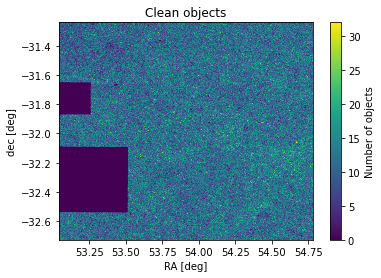

In [57]:
#have a look at the ra, dec, distribution in magnitudes
#Notice these are all observed objects including stars
#plt.figure(1)
plt.hist2d(data['ra'], data['dec'],256); plt.gca().set_aspect('equal');
plt.xlabel('RA [deg]');
plt.ylabel('dec [deg]');
plt.title('Clean objects');
plt.colorbar(label='Number of objects');

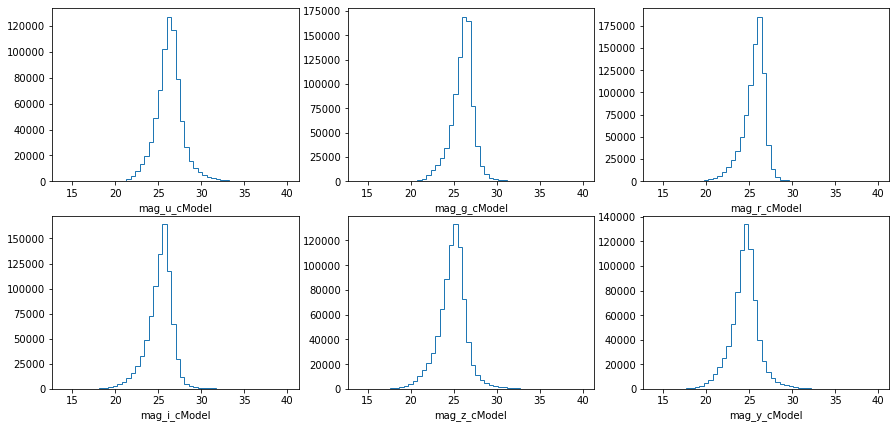

In [62]:
fig,axarr=plt.subplots(2,3,figsize=[15,7])

plt.sca(axarr[0,0])
plt.hist(data_basic['mag_u_cModel'],bins=50,range=[14,40],histtype='step')
plt.xlabel('mag_u_cModel');

plt.sca(axarr[0,1])
plt.hist(data_basic['mag_g_cModel'],bins=50,range=[14,40],histtype='step')
plt.xlabel('mag_g_cModel');

plt.sca(axarr[0,2])
plt.hist(data_basic['mag_r_cModel'],bins=50,range=[14,40],histtype='step')
plt.xlabel('mag_r_cModel');

plt.sca(axarr[1,0])
plt.hist(data_basic['mag_i_cModel'],bins=50,range=[14,40],histtype='step')
plt.xlabel('mag_i_cModel');

plt.sca(axarr[1,1])
plt.hist(data_basic['mag_z_cModel'],bins=50,range=[14,40],histtype='step')
plt.xlabel('mag_z_cModel');

plt.sca(axarr[1,2])
plt.hist(data_basic['mag_y_cModel'],bins=50,range=[14,40],histtype='step')
plt.xlabel('mag_y_cModel');

In [19]:
#Look at the object ID
#print(data_basic['objectId'][:5])

[19483346044191814 19483346044191821 19483346044191827 19483346044191828
 19483346044191831]


/tmp/ipykernel_49703/3035488888.py:1: RuntimeWarning: invalid value encountered in subtract
  plt.plot(data_basic['mag_g_cModel'][::100]-data_basic['mag_r_cModel'][::100],


(25.0, 14.0)

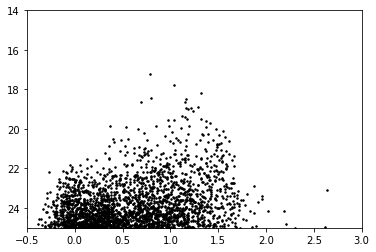

In [79]:
plt.plot(data_basic['mag_g_cModel'][::100]-data_basic['mag_r_cModel'][::100], 
         data_basic['mag_r_cModel'][::100],'k.',markersize=3)
plt.xlim([-0.5,3])
plt.ylim([25,14])

/tmp/ipykernel_49703/1348907398.py:1: RuntimeWarning: invalid value encountered in subtract
  plt.plot(data_basic['mag_g_cModel'][::100]-data_basic['mag_r_cModel'][::100],


(-1.0, 2.0)

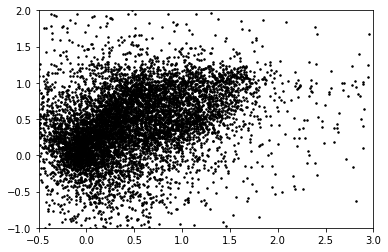

In [67]:
plt.plot(data_basic['mag_g_cModel'][::100]-data_basic['mag_r_cModel'][::100], 
         data_basic['mag_r_cModel'][::100]-data_basic['mag_i_cModel'][::100],'k.',markersize=3)
plt.xlim([-0.5,3])
plt.ylim([-1,2])

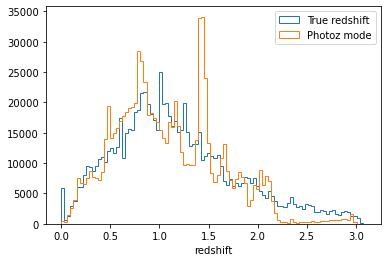

In [71]:
plt.hist(data_basic['redshift_truth'],bins=100,range=[0,3.1],histtype='step',label='True redshift')
plt.hist(data_basic['photoz_mode'],bins=100,range=[0,3.1],histtype='step',label='Photoz mode')
plt.xlabel('redshift')
plt.legend()

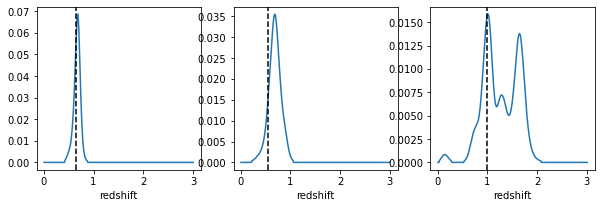

In [80]:
#Access some of the photo-z distributions
fig,axarr=plt.subplots(1,3,figsize=[10,3])

for ii in range(3):
    plt.sca(axarr[ii])
    pdf=data_basic['photoz_pdf'][::100][ii]
    plt.plot(catalog.photoz_pdf_bin_centers, pdf,label='p(z)');
    #true redshift
    plt.axvline(data_basic['redshift_truth'][::100][ii],color='k',linestyle='--')
    plt.xlabel('redshift')